In [138]:
import geopandas as gpd
import pandas as pd

In [139]:
fp = r'locations_20190718.csv'
data = pd.read_csv(fp)

In [140]:
data.head()

,route_code,cyclenumber,latitude,longitude,coord_date,coord_time
0,1563397276221,2519,58.378092,26.726292,2019-07-18,00:01:53+00
1,1563397276221,2519,58.378092,26.726292,2019-07-18,00:01:58+00
2,1563397276221,2519,58.378092,26.726292,2019-07-18,00:02:03+00
3,1563397276221,2519,58.378092,26.726292,2019-07-18,00:02:08+00
4,1563397276221,2519,58.378020,26.726333,2019-07-18,00:02:53+00


In [141]:
data['route_code'] = [f'B-{code}' for code in data['route_code']]
data['timestamp'] = data['coord_date'] + ' ' + data['coord_time']

In [142]:
# del data['route_code']
data.head()

,route_code,cyclenumber,latitude,longitude,coord_date,coord_time,timestamp
0,B-1563397276221,2519,58.378092,26.726292,2019-07-18,00:01:53+00,2019-07-18 00:01:53+00
1,B-1563397276221,2519,58.378092,26.726292,2019-07-18,00:01:58+00,2019-07-18 00:01:58+00
2,B-1563397276221,2519,58.378092,26.726292,2019-07-18,00:02:03+00,2019-07-18 00:02:03+00
3,B-1563397276221,2519,58.378092,26.726292,2019-07-18,00:02:08+00,2019-07-18 00:02:08+00
4,B-1563397276221,2519,58.378020,26.726333,2019-07-18,00:02:53+00,2019-07-18 00:02:53+00


In [143]:
data.dtypes

route_code      object
cyclenumber      int64
latitude       float64
longitude      float64
coord_date      object
coord_time      object
timestamp       object
dtype: object

In [144]:
# data['route_code'].nunique()

In [145]:
data['cyclenumber'].nunique()

437

In [146]:
data = data.loc[data['coord_date']!= '2019-07-22']

In [147]:
data.to_csv(r'product/1807_daily_bikemoves.csv')

In [148]:
import osmnx  as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point

In [149]:
geodata = gpd.GeoDataFrame(data)

geodata['geometry'] = [Point(lon, lat) for lon, lat in zip(geodata['longitude'], geodata['latitude'])]

In [151]:
convex = geodata.unary_union.convex_hull

In [152]:
graph_extent = convex.buffer(0.02)

In [153]:
graph = ox.graph_from_polygon(graph_extent, network_type= 'bike')

In [154]:
# Get the GeoDataFrame
edges = ox.graph_to_gdfs(graph, nodes=False)

<AxesSubplot:>

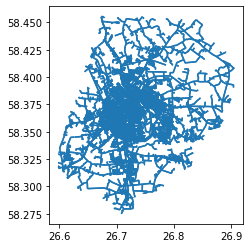

In [155]:
edges.plot()

In [156]:
edges = edges.reset_index(drop=True)
edges = edges[['geometry']]

edges.head()

,geometry
0,"LINESTRING (26.73016 58.37857, 26.72998 58.378..."
1,"LINESTRING (26.73016 58.37857, 26.73027 58.378..."
2,"LINESTRING (26.73056 58.37979, 26.73061 58.379..."
3,"LINESTRING (26.73056 58.37979, 26.73068 58.380..."
4,"LINESTRING (26.73056 58.37979, 26.73051 58.379..."


In [157]:
type(edges)

geopandas.geodataframe.GeoDataFrame

In [158]:
edges.to_file(r'product/bike_network.geojson', driver='GeoJSON')